In [15]:
### 경사하강법 Gradient Descent

In [22]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier # 경사하강법

import matplotlib.pyplot as plt


In [4]:
# 분류 (Classification) : 로지스틱 회귀 (유럽/북미 민물고기)

fish = pd.read_csv("data/fish.csv")
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [5]:
# input data 와 target data 분리 
# sk-learn : numpy 사용
fish_input = fish[['Weight', 'Length','Diagonal','Height','Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

In [6]:
print(fish_input.shape)
print(fish_target.shape)

(159, 5)
(159,)


In [9]:
X_train, X_test, y_train, y_test = \
train_test_split(fish_input, fish_target, random_state=42)

In [11]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(119, 5) (40, 5)
(119,) (40,)


In [12]:
# 데이터 정규화
ss = StandardScaler()
ss.fit(X_train)
train_scaled = ss.transform(X_train)
test_scaled = ss.transform(X_test)


In [14]:
print(train_scaled[:5])
print(test_scaled[:5])

[[ 0.91965782  0.60943175  0.81041221  1.85194896  1.00075672]
 [ 0.30041219  1.54653445  1.45316551 -0.46981663  0.27291745]
 [-1.0858536  -1.68646987 -1.70848587 -1.70159849 -2.0044758 ]
 [-0.79734143 -0.60880176 -0.67486907 -0.82480589 -0.27631471]
 [-0.71289885 -0.73062511 -0.70092664 -0.0802298  -0.7033869 ]]
[[-0.88741352 -0.91804565 -1.03098914 -0.90464451 -0.80762518]
 [-1.06924656 -1.50842035 -1.54345461 -1.58849582 -1.93803151]
 [-0.54401367  0.35641402  0.30663259 -0.8135697  -0.65388895]
 [-0.34698097 -0.23396068 -0.22320459 -0.11905019 -0.12233464]
 [-0.68475132 -0.51509149 -0.58801052 -0.8998784  -0.50124996]]


In [32]:
# 경사하강법
# hyper parameter : loss="log_loss" :로스율 ,max_iter=10 : 반복 보통 100을 사용함 ,random_state=42 : random값
sc = SGDClassifier(loss="log_loss",max_iter=100,tol=None,random_state=42)

sc.fit(train_scaled, y_train)

print(sc.score(train_scaled, y_train))
print(sc.score(test_scaled, y_test))

0.957983193277311
0.925


In [19]:
# 0.7899159663865546
# 0.825
# 스코어 값이 적으므로 반복수를 늘임

sc.partial_fit(train_scaled, y_train)

print(sc.score(train_scaled, y_train))
print(sc.score(test_scaled, y_test))

0.8067226890756303
0.8


In [20]:
sc.partial_fit(train_scaled, y_train)

print(sc.score(train_scaled, y_train))
print(sc.score(test_scaled, y_test))

0.773109243697479
0.8


In [21]:
sc.partial_fit(train_scaled, y_train)

print(sc.score(train_scaled, y_train))
print(sc.score(test_scaled, y_test))

0.865546218487395
0.875


In [ ]:
# 과대적합 : train을 많이하면 test 결과값이 안나옴(train data는 높으나, test data는 안나옴)
# 과소적합 : train을 적게하면 test 결과값이 안나옴(train data가 덜되서, test data가 안나옴)

In [23]:
# 스코어값으로 graph를 그림, 에포크를 for문으로 300회
sc = SGDClassifier(loss="log_loss", random_state=42)

train_score = []
test_score = []

classes = np.unique(y_train)

for _ in range(0,300):
    sc.partial_fit(train_scaled, y_train, classes=classes)
    train_score.append(sc.score(train_scaled, y_train))
    test_score.append(sc.score(test_scaled, y_test))

In [26]:
train_score

[0.5294117647058824,
 0.6218487394957983,
 0.6386554621848739,
 0.7142857142857143,
 0.7142857142857143,
 0.7394957983193278,
 0.7058823529411765,
 0.7226890756302521,
 0.7563025210084033,
 0.8067226890756303,
 0.8151260504201681,
 0.8487394957983193,
 0.8403361344537815,
 0.8571428571428571,
 0.8739495798319328,
 0.8571428571428571,
 0.8571428571428571,
 0.8739495798319328,
 0.8739495798319328,
 0.8739495798319328,
 0.8907563025210085,
 0.8739495798319328,
 0.8739495798319328,
 0.8823529411764706,
 0.8907563025210085,
 0.8907563025210085,
 0.8739495798319328,
 0.8991596638655462,
 0.8991596638655462,
 0.8991596638655462,
 0.8991596638655462,
 0.8907563025210085,
 0.8907563025210085,
 0.8823529411764706,
 0.907563025210084,
 0.8991596638655462,
 0.9243697478991597,
 0.907563025210084,
 0.9243697478991597,
 0.9159663865546218,
 0.9159663865546218,
 0.9243697478991597,
 0.9327731092436975,
 0.9243697478991597,
 0.9327731092436975,
 0.9243697478991597,
 0.9327731092436975,
 0.932773109243

In [27]:
test_score

[0.65,
 0.55,
 0.575,
 0.7,
 0.7,
 0.7,
 0.725,
 0.7,
 0.775,
 0.8,
 0.825,
 0.875,
 0.875,
 0.9,
 0.875,
 0.875,
 0.9,
 0.9,
 0.9,
 0.9,
 0.9,
 0.9,
 0.9,
 0.9,
 0.9,
 0.925,
 0.9,
 0.925,
 0.925,
 0.925,
 0.925,
 0.9,
 0.925,
 0.9,
 0.925,
 0.9,
 0.925,
 0.9,
 0.925,
 0.9,
 0.925,
 0.9,
 0.925,
 0.9,
 0.925,
 0.9,
 0.925,
 0.9,
 0.925,
 0.925,
 0.925,
 0.925,
 0.925,
 0.925,
 0.925,
 0.925,
 0.925,
 0.925,
 0.925,
 0.925,
 0.925,
 0.925,
 0.925,
 0.925,
 0.925,
 0.925,
 0.925,
 0.925,
 0.925,
 0.925,
 0.925,
 0.925,
 0.925,
 0.925,
 0.925,
 0.925,
 0.925,
 0.925,
 0.925,
 0.925,
 0.925,
 0.925,
 0.925,
 0.925,
 0.925,
 0.925,
 0.925,
 0.925,
 0.925,
 0.925,
 0.925,
 0.925,
 0.925,
 0.925,
 0.925,
 0.925,
 0.925,
 0.925,
 0.925,
 0.925,
 0.925,
 0.925,
 0.925,
 0.925,
 0.925,
 0.925,
 0.925,
 0.925,
 0.925,
 0.925,
 0.925,
 0.925,
 0.925,
 0.925,
 0.925,
 0.925,
 0.925,
 0.925,
 0.925,
 0.925,
 0.925,
 0.925,
 0.925,
 0.925,
 0.925,
 0.925,
 0.925,
 0.925,
 0.925,
 0.925,
 0.925,
 0.9

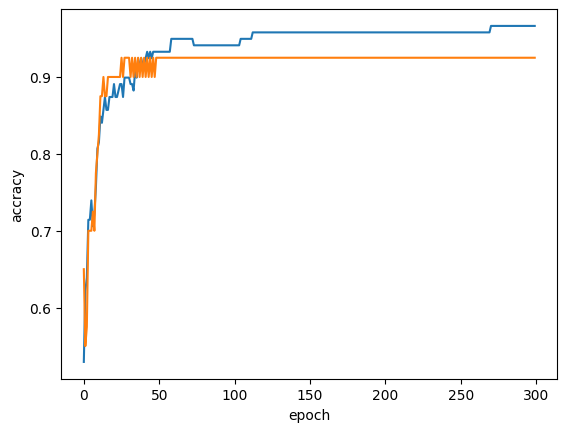

In [ ]:
# 보통 x_test값이 반복수가 많아지면, 떨어지는 경우가 발생함
plt.plot(train_score)
plt.plot(test_score)
plt.xlabel("epoch")
plt.ylabel("accracy")
plt.show()


In [ ]:
# 다른 loss율 종류 tolerance값에 따라 확률이 달라짐
sc = SGDClassifier(loss="hinge", max_iter=100, tol=None ,random_state=42)

sc.fit(train_scaled, y_train)

print(sc.score(train_scaled, y_train))
print(sc.score(test_scaled, y_test))

0.9495798319327731
0.925
